In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

## Import the Data 

In [2]:
df = pd.read_csv('BTC_Trial_NB.csv')
df.head()

,Date,Month,Year,VOL1,VOL7,VOL30,ClosePrice,OpenPrice,HighPrice,LowPrice,...,SP500,RUSSELL,Oil,Gold,Silver,USDEUR,USDYUAN,Interest Rate,Economic Uncertainty,Crypto Index
0,04/02/2018,2,2018,0.058984,0.104624,0.204218,8277.01,9175.70,9334.87,8031.22,...,2648.94,1491.09,64.18,1336.5,16.71,0.80,6.30,1.80,0.234505,30
1,05/02/2018,2,2018,0.082982,0.130688,0.219808,6955.27,8270.54,8364.84,6756.68,...,2648.94,1491.09,64.18,1336.5,16.67,0.80,6.31,1.80,0.248054,15
2,06/02/2018,2,2018,0.041061,0.134668,0.221316,7754.00,7051.75,7850.70,6048.26,...,2695.14,1507.17,63.48,1329.5,16.58,0.81,6.29,1.82,0.223228,40
3,07/02/2018,2,2018,0.041213,0.136422,0.222866,7621.30,7755.49,8509.11,7236.79,...,2681.66,1507.97,61.91,1314.6,16.24,0.81,6.28,1.85,0.201785,24
4,08/02/2018,2,2018,0.030796,0.130387,0.222486,8265.59,7637.86,8558.77,7637.86,...,2581.00,1463.79,61.30,1319.0,16.34,0.82,6.27,1.85,0.183604,11


In [3]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df = df.drop(['Date', 'Month', 'Year', 'Network Difficulty'],axis=1)
df.head()

,VOL1,VOL7,VOL30,ClosePrice,OpenPrice,HighPrice,LowPrice,Market Volumn,Average Block Size,Average Transaction Per Block,...,SP500,RUSSELL,Oil,Gold,Silver,USDEUR,USDYUAN,Interest Rate,Economic Uncertainty,Crypto Index
0,0.058984,0.104624,0.204218,8277.01,9175.70,9334.87,8031.22,7.073550e+09,0.99,975.77,...,2648.94,1491.09,64.18,1336.5,16.71,0.80,6.30,1.80,0.234505,30
1,0.082982,0.130688,0.219808,6955.27,8270.54,8364.84,6756.68,9.285290e+09,1.10,1169.53,...,2648.94,1491.09,64.18,1336.5,16.67,0.80,6.31,1.80,0.248054,15
2,0.041061,0.134668,0.221316,7754.00,7051.75,7850.70,6048.26,1.399980e+10,1.07,1436.00,...,2695.14,1507.17,63.48,1329.5,16.58,0.81,6.29,1.82,0.223228,40
3,0.041213,0.136422,0.222866,7621.30,7755.49,8509.11,7236.79,9.169280e+09,1.07,1515.74,...,2681.66,1507.97,61.91,1314.6,16.24,0.81,6.28,1.85,0.201785,24
4,0.030796,0.130387,0.222486,8265.59,7637.86,8558.77,7637.86,9.346750e+09,1.05,1322.82,...,2581.00,1463.79,61.30,1319.0,16.34,0.82,6.27,1.85,0.183604,11


In [4]:
pd.set_option('display.max_columns', None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310 entries, 0 to 2309
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   VOL1                           2310 non-null   float64
 1   VOL7                           2310 non-null   float64
 2   VOL30                          2310 non-null   float64
 3   ClosePrice                     2310 non-null   float64
 4   OpenPrice                      2310 non-null   float64
 5   HighPrice                      2310 non-null   float64
 6   LowPrice                       2310 non-null   float64
 7   Market Volumn                  2310 non-null   float64
 8   Average Block Size             2310 non-null   float64
 9   Average Transaction Per Block  2310 non-null   float64
 10  Hash Rate                      2310 non-null   float64
 11  Unique Addresses               2310 non-null   int64  
 12  Transactions Per Second        2310 non-null   f

In [5]:
df.isna().sum()

VOL1                             0
VOL7                             0
VOL30                            0
ClosePrice                       0
OpenPrice                        0
HighPrice                        0
LowPrice                         0
Market Volumn                    0
Average Block Size               0
Average Transaction Per Block    0
Hash Rate                        0
Unique Addresses                 0
Transactions Per Second          0
SP500                            0
RUSSELL                          0
Oil                              0
Gold                             0
Silver                           0
USDEUR                           0
USDYUAN                          0
Interest Rate                    0
Economic Uncertainty             0
Crypto Index                     0
dtype: int64

## 1. Data Preprocessing

### 1.2 Scale the data

In [6]:
from sklearn import preprocessing

df_for_training=df[:1848]
df_for_testing=df[1848:]

scaler = preprocessing.MinMaxScaler()
df_for_training_scaled = scaler.fit_transform(df_for_training)

df_for_testing_scaled=scaler.transform(df_for_testing)

In [7]:
df_for_training_scaled.shape, df_for_testing_scaled.shape

((1848, 23), (462, 23))

### 1.3 Create the reshaped input vector for the LSTM model 

In [8]:
def createXY(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            dataY.append(dataset[i,0])
    return np.array(dataX),np.array(dataY)

The input of the model is the scaled data of the closing price, with the time atep (window) of 30 observations

In [9]:
trainX,trainY=createXY(df_for_training_scaled,30)
testX,testY=createXY(df_for_testing_scaled,30)

In [10]:
trainX.shape, trainY.shape, testX.shape, testY.shape

((1818, 30, 23), (1818,), (432, 30, 23), (432,))

## 2. Deep learning modelling: LSTM model with 1 LSTM layer and 2 Dense layers (Vanilla)

### 2.1 Fitting the model

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers  import *
from tensorflow.keras.losses import MeanSquaredError 
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [12]:
model = Sequential()
model.add(InputLayer((trainX.shape[1], trainX.shape[2])))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        22,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,057 (90.07 KB)

 Trainable params: 23,057 (90.07 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(loss = MeanSquaredError(), optimizer= Adam(learning_rate= 0.001), metrics= [RootMeanSquaredError()])

In [14]:
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=20, batch_size=128) 

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 0.0220 - root_mean_squared_error: 0.1433 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0474
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0061 - root_mean_squared_error: 0.0771 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0408
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0048 - root_mean_squared_error: 0.0688 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0415
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0049 - root_mean_squared_error: 0.0697 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0386
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0050 - root_mean_squared_error: 0.0704 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0381
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0046 - root_mean_squared_error: 0.0679 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0380
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss:

### 2.2 Model's prediction and evaluation

Model's prediction on the training set:

In [15]:
train_pred = model.predict(trainX).flatten()
train_pred

57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


array([0.184489  , 0.205808  , 0.21201275, ..., 0.07323234, 0.07338987,
       0.07245263], dtype=float32)

In [16]:
train_result = pd.DataFrame(data= {'Train Pred':train_pred, 'Actual':trainY.flatten()})
train_result

,Train Pred,Actual
0,0.184489,0.285519
1,0.205808,0.259299
2,0.212013,0.318630
3,0.228240,0.189473
4,0.220657,0.248129
...,...,...
1813,0.073877,0.082501
1814,0.074612,0.072250
1815,0.073232,0.092849
1816,0.073390,0.072543


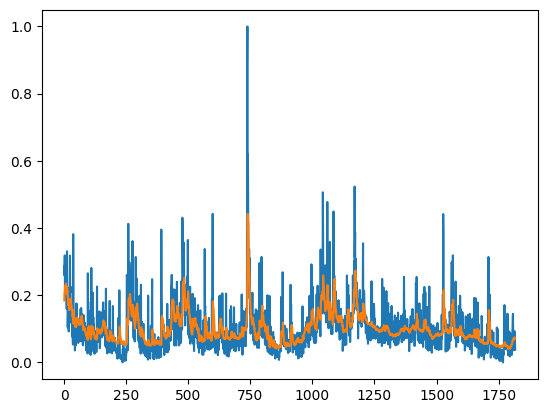

In [17]:
plt.plot(train_result['Actual'])
plt.plot(train_result['Train Pred'])


Model's prediction on the test set:

In [18]:
test_pred = model.predict(testX).flatten()
test_result = pd.DataFrame(data= {'Test Pred':test_pred, 'Actual':testY.flatten()})
test_result

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


,Test Pred,Actual
0,0.092510,0.079889
1,0.084973,0.091336
2,0.081024,0.111259
3,0.080200,0.064627
4,0.067313,0.028034
...,...,...
427,0.001075,0.078970
428,0.015609,0.039090
429,0.019277,0.057859
430,0.016959,0.047275


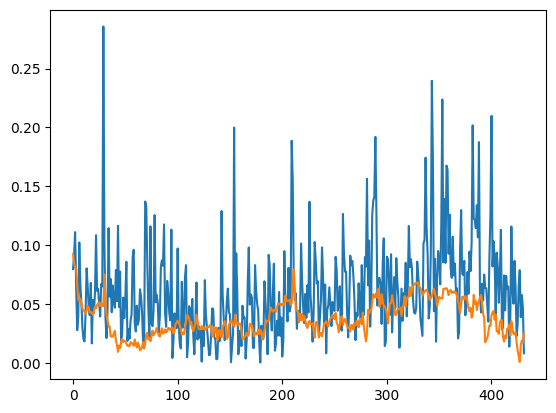

In [19]:
plt.plot(test_result['Actual'])
plt.plot(test_result['Test Pred'])

The RMSE of the predicted value on the Test data: 

In [20]:
RMSE_1 = np.sqrt(mean_squared_error(testY, test_pred))
RMSE_1

0.04524929459123178

## 3. Hyperparameter tuning: Tuning model with 2 lstm layers and 2 Dense layers 

### 3.1 Initialize the model tunning function

In [21]:
import keras_tuner as kt

In [22]:
def build_model(hp):
    model = Sequential()
    model.add(InputLayer((trainX.shape[1], trainX.shape[2])))
    
    lstm_units = hp.Choice('lstm_units', values=[32, 64, 128, 256])
    model.add(LSTM(lstm_units, return_sequences=True))
    
    dropout_rate = hp.Choice('dropout_rate', values=[0.05, 0.1, 0.15, 0.2])
    model.add(Dropout(dropout_rate))
    
    model.add(LSTM(lstm_units))
    model.add(Dropout(dropout_rate))
    
    activation_function = hp.Choice('activation_function', values=['relu', 'tanh'])
    dense_units = hp.Choice('dense_units', values=[8, 16, 32, 64])  
    model.add(Dense(dense_units, activation=activation_function))
    model.add(Dense(1, activation='linear'))
    
    learning_rate = hp.Choice('learning_rate', values=[0.001, 0.01, 0.1])
    model.compile(
        loss=MeanSquaredError(),
        optimizer=Adam(learning_rate=learning_rate),
        metrics=[RootMeanSquaredError()]
    )
    return model

In [33]:
tuner = kt.GridSearch(
    build_model,
    objective='val_loss',
    # max_trials=400,
    executions_per_trial=1,
    directory='my_model9',
    project_name='lstm_tuning'
)

### 3.2 Start the tuning process

We set the number of epoch equals 20 with the batch size of 32. The model uses the Test set as the validation data. 

In [34]:
tuner.search(
    trainX, trainY,
    epochs= 50,
    batch_size= 64,
    validation_data=(testX, testY)
)

Trial 316 Complete [00h 22m 33s]
val_loss: 0.00143534189555794

Best val_loss So Far: 0.0012603352079167962
Total elapsed time: 1d 09h 21m 16s

Search: Running Trial #317

Value             |Best Value So Far |Hyperparameter
256               |32                |lstm_units
0.1               |0.05              |dropout_rate
relu              |tanh              |activation_function
16                |16                |dense_units
0.01              |0.01              |learning_rate

Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - loss: 2.0777 - root_mean_squared_error: 1.3240 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0451
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 27s 914ms/step - loss: 0.0052 - root_mean_squared_error: 0.0719 - val_loss: 0.0055 - val_root_mean_squared_error: 0.0741
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 27s 942ms/step - loss: 0.0053 - root_mean_squared_error: 0.0730 - val_loss: 0.0075 - val_root_mean_squared_error: 0.0864
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 26

Obtaining the best performing model and set it to "best_model"

In [25]:
best_model = tuner.get_best_models(num_models=1)[0]
best_model

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


<Sequential name=sequential, built=True>

This is the result of the 10 best performing model:

In [26]:
tuner.results_summary()

Results summary
Results in my_model8\lstm_tuning
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 0010 summary
Hyperparameters:
lstm_units: 32
dropout_rate: 0.05
activation_function: relu
dense_units: 64
learning_rate: 0.01
Score: 0.0012697719503194094

Trial 0082 summary
Hyperparameters:
lstm_units: 32
dropout_rate: 0.2
activation_function: relu
dense_units: 64
learning_rate: 0.01
Score: 0.0012708408758044243

Trial 0004 summary
Hyperparameters:
lstm_units: 32
dropout_rate: 0.05
activation_function: relu
dense_units: 16
learning_rate: 0.01
Score: 0.0012744879350066185

Trial 0007 summary
Hyperparameters:
lstm_units: 32
dropout_rate: 0.05
activation_function: relu
dense_units: 32
learning_rate: 0.01
Score: 0.0012792476918548346

Trial 0106 summary
Hyperparameters:
lstm_units: 64
dropout_rate: 0.05
activation_function: relu
dense_units: 64
learning_rate: 0.01
Score: 0.001279776101000607

Trial 0190 summary
Hyperparameters:
lstm_units: 64
dropout_rate: 0.2
activa

We extract the hyperparameters from the best performing model and set it to "best_hp"

In [27]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
The best hyperparameters are:
- lstm_units: {best_hps.get('lstm_units')}
- dropout_rate: {best_hps.get('dropout_rate')}
- activation function: {best_hps.get('activation_function')}
- dense_units: {best_hps.get('dense_units')}
- learning_rate: {best_hps.get('learning_rate')}
""")


The best hyperparameters are:
- lstm_units: 32
- dropout_rate: 0.05
- activation function: relu
- dense_units: 64
- learning_rate: 0.01



Predicting the value of the Test data using best_model:

In [28]:
y_pred = best_model.predict(testX)
# best_test_result = pd.DataFrame(data= {'Test Pred':y_test_best_pred, 'Actual':testY.flatten()})

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


In [29]:
prediction_copies_array = np.repeat(y_pred,23, axis=-1)
original_copies_array = np.repeat(testY,23, axis=-1)

pred = scaler.inverse_transform(np.reshape(prediction_copies_array,(len(y_pred),23)))[:,0]
original=scaler.inverse_transform(np.reshape(original_copies_array,(len(testY),23)))[:,0]

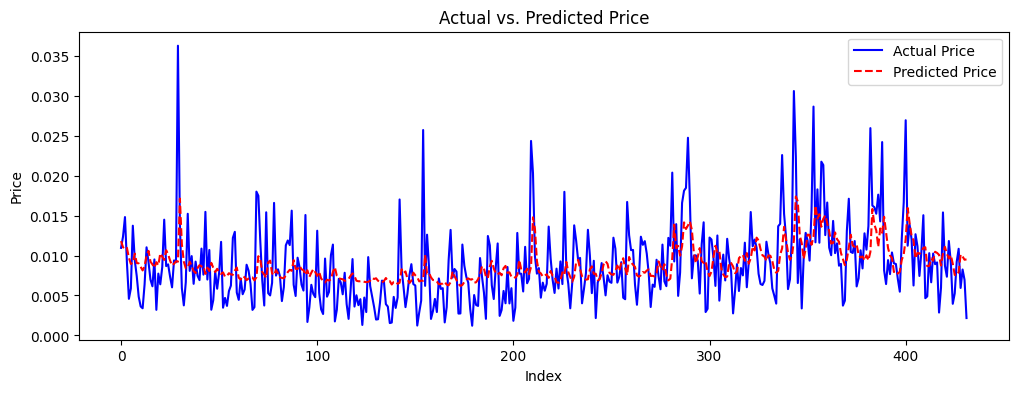

In [30]:
# Flattening the predictions and actual values
y_test_flat = np.ravel(original)
y_pred_flat = np.ravel(pred)

# Plotting
indices = np.arange(len(y_test_flat))

plt.figure(figsize=(12, 4))
plt.plot(indices, y_test_flat, label='Actual Price', color='blue')
plt.plot(indices, y_pred_flat, label='Predicted Price', color='red', linestyle='--')

plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Price')
plt.legend()
plt.show()

In [ ]:
# RMSE
from sklearn.metrics import mean_squared_error
import numpy as np
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#NMSE
def nmse(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    variance = np.var(y_true)
    return mse / variance

#DA
def DA(y_true, y_pred):
    # Convert the arrays to numpy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Calculate the direction of change
    true_direction = np.sign(np.diff(y_true))
    pred_direction = np.sign(np.diff(y_pred))
    
    # Compare directions
    correct_direction = np.sum(true_direction == pred_direction)
    total_direction = len(true_direction)
    
    # Calculate directional accuracy
    da = correct_direction / total_direction * 100
    
    return da


In [ ]:
y_true = y_test_flat
y_predi = y_pred_flat

print("RMSE: ", rmse(y_true, y_predi))
print("MAPE: ", mape(y_true, y_predi))
print("NMSE: ", nmse(y_true, y_predi))
print("DA: ", DA(y_true, y_predi))


RMSE:  1724.0693680937968
MAPE:  3.0949428925056344
NMSE:  0.012778356900982498
DA:  46.635730858468676
